### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

In [3]:
upper_sm = np.load('/mnt/files/upper_sm.npy')

In [4]:
similarity_matrix = np.load('/mnt/files/sim_matrix.npy')

In [5]:
hierarchical_cluster = np.load('/mnt/files/hierarchical_cluster.npy')

### Result Shapes

In [6]:
matrix.shape

(95458, 1226)

In [7]:
upper_sm.shape

(4556067153,)

In [8]:
similarity_matrix.shape

(95458, 95458)

In [9]:
hierarchical_cluster.shape

(95457, 4)

### Slicing consider similar objects

In [10]:
row_idx = np.array([0,1,3,4,5,6,8,10,12,13,18,22,23,24,26,29,36,39,40,41,42,43,45,47,50,58,59,63,65,66,68,72,73,77,80,81,82,86,87,90,92,94,95,98,99,102,104,107,108,109,110,111,118,121,122,126,127,129,133,136,137,141,142,155,156,157,158,163,172,173,180,182,187,188,189,191,193,204,205,221,222,224,259,261,265,266,338,340,347,349,350,351,355,356,357,359,360,362,363,364,366,367,369,371,372,374,377,380,382,383,385,403,405,406,408,411,412,413,416,420,423,431,432,435,436,437,439,443,447,448,452,456,459,462,477,481,482,483,484,486,492,493,494,497,500,501,519,525,530,531,533,534,542,547,549,550,558,565,568,570,574,575,577,584,586,591,594,596,597,598,600,602,603,610,621,626,629,633,635,645,648,653,654,657,664,669,670,677,678,679,681,682,689,698,699,702,703,707,724,729,731,733,736,737,739,740,747,749,780,869,870,871,874,880,900,902,903,911,913,914,923,924,928,930,953,956,969,970,971,974,992,993,998,1002,1003,1010,1022,1027,1033,1034,1036,1041,1045,1052,1056,1061,1062,1068,1073,1077,1086,1087,1096,1099,1102,1117,1120,1124,1129,1131,1134,1137,1143,1144,1145,1149,1153,1155,1156,1168,1169,1170,1182,1184,1185,1188,1192,1195,1201,1205,1214,1222,1223,1229,1230,1234,1235,1236,1249,1254,1282,1322,1325,1340,1375,1384,1408,1444,1454,1472,1475,1484,1490,1508,1509,1544,1565,1582,1602,1618,1642,1667,1668,1676,1686,1765,1782,1795,1801,1874,1887,1892,1902,1956,1958,1978,1981,1990,1992,2003,2012,2072,2090,2091,2105,2143,2160,2172,2198,2213,2220,2325,2363,2366,2369,2372,2374,2386,2426,2434,2439,2440,2442,2454,2460,2468,2471,2475,2477,2479,2480,2484,2486,2487,2498,2518,2519,2522,2525,2527,2537,2545,2569,2576,2577,2578,2579,2580,2586,2587,2589,2596,2604,2608,2613,2618,2620,2621,2623,2635,2636,2641,2650,2656,2662,2664,2668,2698,2706,2718,2728,2732,2736,2740,2767,2769,2774,2777,2781,2792,2795,2796,2815,2845,2849,2868,2869,2874,2876,2879,2880,2885,2886,2889,2894,2900,2927,2929,2933,2934,2947,2953,2960,2964,2975,2980,2985,2986,2989,2991,2992,2994,2996,2997,3005,3029,3030,3031,3034,3037,3047,3055,3061,3080,3081,3087,3098,3105,3114,3116,3121,3125,3136,3137,3139,3146,3147,3150,3151,3152,3153,3159,3161,3163,3200,3202,3204,3207,3228,3230,3235,3238,3242,3247,3251,3269,3275,3279,3280,3284,3285,3286,3287,3297,3308,3319,3321,3322,3327,3337,3339,3341,3344,3345,3346,3351,3353,3354,3361,3367,3374,3375,3388,3392,3393,3398,3401,3438,3440,3441,3445,3446,3447,3450,3453,3471,3472,3485,3497,3536,3538,3546,3554,3601,3602,3603,3616,3620,3651,3656,3657,3665,3674,3679,3685,3694,3698,3701,3706,3707,3712,3719,3720,3723,3724,3725,3726,3727,3730,3731,3737,3771,3802,3806,3829,3831,3857,3859,3869,3875,3877,3900,3902,3916,3918,3919,3924,3925,3930,3935,3939,3963,3968,3981,3988,3989,3998,4001,4010,4016,4037,4050,4067,4068,4070,4076,4077,4094,4095,4108,4110,4111,4112,4113,4123,4126,4128,4134,4140,4143,4158,4164,4183,4202,4204,4205,4215,4218,4219,4227,4230,4234,4244,4252,4263,4270,4275,4282,4284,4296,4307,4311,4322,4323,4346,4354,4355,4358,4381,4384,4385,4395,4402,4410,4413,4414,4417,4425,4427,4440,4460,4483,4511,4516,4526,4529,4532,4533,4535,4540,4544,4550,4578,4586,4598,4601,4603,4607,4611,4612,4613,4614,4621,4632,4650,4652,4654,4655,4670,4673,4680,4697,4700,4708,4779,4790,4853,4863,4872,4885,4897,4900,4941,4942,4946,4969,5018,5019,5155,5169,5173,5180,5182,5184,5190,5193,5198,5199,5203,5206,5207,5209,5211,5268,5270,5273,5277,5295,5317,5325,5332,5337,5345,5346,5348,5351,5358,5364,5365,5367,5377,5382,5384,5389,5419,5426,5438,5440,5444,5473,5495,5500,5518,5525,5532,5537,5548,5550,5583,5597,5627,5631,5640,5651,5694,5702,5722,5723,5770,5771,5772,5773,5801,5805,5812,5813,5818,5819,5822,5824,5825,5827,5829,5831,5833,5841,5842,5844,5846,5857,5858,5874,5875,5881,5882,5884,5891,5892,5898,5908,5909,5911,5912,5924,5925,5937,5942,5945,5946,5961,5971,5984,5985,5996,6019,6023,6031,6038,6058,6067,6069,6070,6080,6085,6088,6114,6115,6116,6129,6131,6133,6138,6176,6177,6179,6184,6204,6207,6220,6221,6246,6250,6252,6253,6280,6286,6288,6311,6317,6318,6334,6342,6348,6362,6367,6384,6386,6394,6400,6402,6415,6438,6442,6450,6465,6467,6488,6500,6512,6515,6526,6547,6548,6566,6593,6601,6605,6608,6609,6616,6618,6619,6621,6625,6626,6629,6648,6655,6670,6676,6681,6696,6698,6719,6741,6760,6773,6790,6807,6815,6816,6825,6832,6833,6838,6856,6859,6897,6917,6933,6939,6959,6984,6988,6989,7045,7058,7059,7068,7083,7085,7086,7094,7097,7101,7174,7177,7178,7226,7275,7276,7278,7286,7291,7296,7311,7331,7341,7361,7365,7367,7372,7383,7388,7391,7400,7421,7459,7468,7485,7492,7507,7515,7528,7536,7537,7553,7554,7555,7577,7593,7597,7633,7666,7675,7676,7695,7703,7705,7707,7733,7743,7748,7752,7758,7768,7770,7783,7790,7806,7809,7829,7831,7832,7847,7855,7873,7880,7886,7889,7890,7894,7932,7940,7947,7983,7987,7993,7994,7996,8009,8011,8036,8040,8063,8064,8080,8093,8094,8106,8130,8149,8178,8194,8196,8203,8208,8211,8217,8221,8224,8241,8276,8281,8311,8313,8314,8315,8318,8336,8343,8348,8352,8355,8391,8393,8395,8406,8417,8422,8455,8461,8467,8475,8483,8484,8490,8508,8513,8550,8563,8571,8606,8607,8615,8625,8637,8639,8660,8661,8671,8675,8676,8677,8681,8682,8687,8693,8695,8712,8715,8718,8720,8722,8724,8733,8739,8744,8754,8755,8756,8760,8771,8774,8805,8806,8809,8816,8825,8828,8833,8839,8871,8888,8890,8891,8897,8936,8957,8963,8975,9018,9019,9021,9025,9028,9044,9047,9050,9051,9053,9056,9068,9100,9120,9122,9129,9132,9133,9137,9143,9156,9161,9164,9170,9179,9188,9224,9237,9267,9270,9293,9316,9328,9335,9366,9380,9392,9403,9415,9433,9442,9450,9452,9454,9473,9475,9476,9535,9557,9560,9562,9563,9564,9566,9577,9589,9710,9762,9779,9784,9793,9810,9811,9814,9829,9841,9846,9917,9933,9940,9945,9948,9950,9963,9966,9970,9971,9980,9995,10010,10016,10022,10025,10031,10036,10048,10051,10059,10060,10066,10077,10081,10094,10097,10098,10102,10106,10120,10123,10130,10132,10135,10138,10143,10151,10152,10213,10214,10217,10225,10226,10229,10233,10237,10255,10260,10270,10293,10297,10310,10317,10341,10362,10373,10391,10401,10419,10422,10429,10445,10471,10474,10475,10553,10622,10625,10632,10643,10646,10658,10661,10672,10678,10679,10690,10699,10705,10706,10710,10714,10717,10737,10789,11026,11065,11156,11182,11372,11480,11515,11559,11568,11583,11590,11625,11627,11637,11659,11669,11685,11691,11695,11708,11710,11713,11716,11724,11727,11735,11747,11751,11771,11777,11779,11781,11815,11818,11821,11826,11827,11828,11857,11858,11869,11877,11926,11953,11970,11983,11997,12000,12011,12012,12078,12083,12099,12105,12112,12129,12677,13118,13140,13155,13173,13174,13178,13183,13189,13194,13196,13207,13211,13215,13220,13224,13225,13226,13233,13247,13252,13255,13282,13285,13292,13331,13347,13360,13368,13385,13417,13418,13419,13434,13435,13443,13446,13447,13455,13464,13466,13477,13479,13489,13576,13600,13613,13635,13636,13637,13641,13646,13707,13732,13847,13875,13882,13884,13912,13934,13952,13954,13957,13958,13959,13963,14019,14022,14026,14027,14033,14069,14130,14140,14144,14166,14175,14206,14211,14213,14226,14231,14239,14248,14293,14306,14318,14321,14344,14345,14347,14349,14351,14352,14363,14367,14389,14400,14419,14426,14448,14454,14467,14476,14487,14488,14493,14522,14571,14635,14662,14679,14680,14685,14715,14743,14747,14761,14785,14809,14811,14813,14819,14886,14901,14906,14912,14915,14984,14999,15019,15022,15024,15042,15046,15065,15077,15082,15090,15106,15109,15110,15157,15181,15207,15232,15241,15249,15251,15255,15256,15260,15286,15300,15330,15467,15547,15597,15615,15617,15629,15636,15661,15663,15664,15671,15672,15689,15694,15724,15744,15769,15772,15773,15774,15790,15791,15831,15837,15840,15843,15852,15896,15905,15943,15987,15989,15996,15999,16000,16009,16010,16030,16058,16065,16066,16069,16074,16088,16126,16177,16188,16214,16224,16228,16232,16234,16264,16270,16303,16304,16306,16307,16393,16408,16425,16475,16489,16490,16497,16498,16504,16506,16523,16525,16530,16559,16573,16574,16579,16581,16588,16610,16639,16642,16655,16663,16685,16686,16722,16733,16746,16758,16786,16823,16830,16842,16845,16848,16869,16875,16892,16912,16913,16916,16920,16923,16934,16965,16995,17022,17119,17128,17137,17155,17173,17238,17261,17265,17273,17277,17282,17355,17358,17409,17416,17417,17420,17424,17458,17473,17476,17477,17481,17487,17488,17508,17511,17536,17538,17548,17552,17583,17607,17623,17634,17643,17646,17707,17708,17764,17771,17809,17811,17824,17834,17850,17862,17863,17865,17895,17900,17905,17910,17926,17933,17935,17937,17954,17973,17974,18004,18008,18009,18013,18015,18045,18062,18065,18096,18109,18114,18165,18181,18187,18197,18216,18246,18285,18286,18291,18413,18415,18429,18448,18454,18510,18527,18547,18563,18576,18577,18578,18581,18600,18613,18639,18652,18721,18728,18740,18754,18756,18760,18763,18780,18800,18821,18825,18827,18828,18833,18871,18877,18896,18928,18935,18936,18954,18978,18990,18994,19028,19037,19055,19056,19059,19065,19071,19077,19084,19106,19107,19108,19115,19119,19125,19156,19164,19177,19187,19197,19203,19206,19222,19464,19475,19490,19519,19526,19528,19532,19549,19566,19592,19604,19620,19621,19622,19624,19673,19690,19712,19730,19753,19768,19774,19776,19790,19838,19845,19856,19858,19862,19869,19870,19873,19885,19918,19934,20135,20177,20211,20220,20228,20230,20252,20264,20269,20279,20283,20316,20329,20335,20349,20359,20360,20365,20366,20424,20442,20444,20453,20456,20457,20465,20466,20469,20480,20482,20483,20485,20504,20539,20544,20546,20559,20571,20584,20586,20596,20618,20640,20641,20643,20652,20692,20702,20732,20740,20750,20758,20761,20764,20807,20829,20849,20877,20888,20908,20937,20949,20955,20962,20986,20995,21003,21014,21020,21025,21026,21035,21050,21053,21138,21164,21170,21173,21192,21196,21212,21231,21258,21265,21270,21278,21310,21311,21312,21314,21328,21343,21347,21383,21429,21434,21435,21437,21457,21471,21493,21494,21499,21514,21532,21751,21756,21773,21790,21798,21801,21805,21816,21820,21851,21883,21947,21973,21975,21995,22267,22271,22277,22283,22378,22461,22470,22499,22513,22561,22564,22610,22617,22618,22626,22682,22695,22703,22704,22718,22770,22771,22801,22808,22818,22869,22874,22882,22886,22890,22905,22907,22932,22965,22970,23024,23040,23041,23042,23057,23058,23079,23088,23106,23109,23115,23254,23265,23277,23292,23315,23320,23321,23336,23353,23391,23392,23393,23394,23398,23422,23467,23554,23557,23563,23565,23567,23573,23582,23622,23639,23640,23670,23677,23688,23727,23750,23790,23798,23804,23806,23839,23845,23846,23863,23876,23951,23962,23964,23978,23979,23995,24037,24118,24160,24172,24173,24178,24230,24234,24248,24259,24260,24268,24271,24276,24277,24285,24297,24302,24312,24315,24321,24323,24337,24362,24366,24439,24474,24480,24481,24491,24501,24526,24534,24536,24562,24642,24658,24684,24828,24851,24852,24853,24863,24873,24917,24939,24940,24951,25001,25018,25075,25082,25097,25100,25127,25366,25396,25398,25413,25490,25577,25588,25590,25630,25645,25701,25702,25712,25736,25754,25776,25780,25789,25796,25797,25801,25810,25815,25827,25830,25877,25890,25915,25917,25946,25956,25967,25969,25985,26004,26009,26012,26020,26053,26105,26112,26139,26140,26148,26167,26203,26210,26232,26256,26258,26276,26285,26289,26336,26344,26365,26436,26446,26456,26458,26489,26492,26506,26552,26563,26590,26607,26630,26639,26640,26648,26667,26671,26710,26740,26744,26745,26755,26764,26801,26802,26804,26814,26818,26830,26833,26853,26857,26902,26919,26922,26931,26932,26938,26958,26976,26978,27005,27017,27020,27028,27029,27043,27400,27401,27403,27405,27449,27455,27457,27503,27507,27511,27541,27550,27558,27620,27621,27629,27659,27660,27668,27672,27683,27691,27695,27701,27724,27730,27817,27856,27867,27942,27948,27950,28010,28012,28015,28020,28032,28038,28064,28068,28087,28101,28116,28118,28146,28160,28187,28192,28221,28256,28277,28295,28315,28351,28357,28358,28364,28365,28379,28387,28636,28660,28665,28669,28685,28686,28776,28788,28790,28791,28799,28823,28873,28885,28902,28967,29035,29091,29162,29222,29245,29246,29257,29277,29280,29298,29304,29323,29328,29424,29428,29442,29443,29444,29449,29488,29494,29549,29550,29556,29576,29600,29640,29642,29889,29895,29896,29919,29973,29980,29983,29987,30032,30046,30100,30117,30131,30153,30173,30183,30187,30189,30215,30226,30230,30247,30253,30394,30402,30403,30439,30495,30514,30516,30535,30553,30833,30841,30888,30902,30903,30948,31008,31020,31022,31040,31060,31063,31068,31069,31070,31072,31106,31284,31285,31310,31347,31375,31410,31411,31466,31474,31483,31485,31492,31495,31501,31510,31531,31532,31539,31582,31583,31586,31599,31623,31639,31669,31735,31736,31793,31798,31819,31821,31841,31847,31896,31943,31948,31982,32031,32035,32042,32050,32051,32069,32078,32080,32081,32085,32087,32190,32191,32309,32317,32373,32415,32437,32443,32446,32496,32498,32501,32503,32504,32525,32536,32550,32562,32574,32599,32605,32607,32632,32635,32657,32663,32664,32665,32674,32676,32678,32686,32687,32729,32737,32741,32797,32804,32812,32924,32929,32940,32976,32977,32978,32980,32984,32985,32987,32993,32994,32996,32997,33001,33005,33008,33022,33026,33033,33042,33068,33085,33103,33104,33108,33118,33119,33139,33143,33150,33188,33223,33232,33239,33248,33268,33270,33298,33304,33308,33312,33350,33369,33384,33387,33390,33392,33398,33413,33423,33431,33435,33522,33532,33556,33594,33603,33612,33663,33666,33671,33713,33720,33763,33774,33778,33873,33886,33912,33916,33941,33945,33947,33956,33969,34042,34044,34058,34070,34109,34111,34139,34142,34151,34163,34173,34175,34179,34186,34223,34246,34254,34308,34310,34319,34333,34397,34399,34417,34450,34451,34467,34468,34469,34511,34534,34574,34582,34591,34665,34690,34701,34827,34844,34871,34880,34902,34956,34964,35004,35016,35032,35054,35076,35078,35080,35083,35085,35106,35107,35108,35137,35217,35218,35244,35267,35297,35356,35366,35387,35433,35446,35458,35466,35488,35489,35501,35510,35536,35549,35554,35615,35633,35645,35656,35664,35672,35719,35737,35748,35765,35787,35813,35815,35821,35854,35858,35874,35931,35982,36015,36023,36044,36061,36095,36104,36127,36155,36172,36192,36215,36217,36220,36271,36291,36307,36329,36341,36342,36400,36438,36440,36464,36483,36491,36495,36497,36498,36518,36519,36522,36528,36548,36557,36562,36593,36594,36613,36614,36619,36630,36642,36674,36677,36699,36722,36729,36731,36756,36822,36868,36883,36893,36896,36906,36938,36939,36942,36943,36952,36956,36973,37046,37061,37062,37065,37086,37116,37160,37174,37175,37176,37185,37258,37304,37327,37359,37406,37408,37415,37440,37442,37443,37484,37503,37513,37536,37559,37569,37577,37591,37592,37622,37623,37723,37725,37738,37753,37760,37795,37834,37867,38015,38604,38623,38628,38632,38650,38652,38697,38714,38791,38809,38813,39111,39112,39114,39133,39142,39159,39176,39198,39217,39221,39257,39263,39299,39312,39413,39414,39458,39477,39485,39510,39511,39518,39519,39548,39563,39566,39589,39663,39665,39670,39712,39722,39746,39778,39782,39784,39785,39787,39815,39824,39898,39904,39977,39983,39988,40017,40019,40042,40045,40047,40053,40060,40103,40128,40175,40222,40228,40236,40243,40249,40276,40279,40296,40307,40364,40411,40454,40474,40565,40573,40578,40598,40631,40634,40842,40879,40903,40905,40962,40973,40974,40978,40979,40991,40996,41004,41005,41007,41026,41051,41052,41067,41125,41139,41140,41152,41164,41187,41223,41310,41324,41325,41365,41383,41396,41435,41467,41479,41496,41557,41593,41630,41634,41693,41697,41698,41699,41700,41723,41724,41740,41761,41765,41768,41777,41803,41853,41868,41870,41877,41898,41903,41913,41914,41919,41935,41988,42015,42035,42086,42130,42136,42171,42254,42255,42258,42316,42358,42361,42398,42400,42401,42402,42404,42405,42406,42423,42437,42444,42447,42456,42457,42463,42507,42514,42522,42560,42561,42581,42583,42585,42587,42612,42623,42624,42629,42635,42655,42658,42724,42734,42739,42747,42754,42778,42822,42828,42851,42908,42934,42983,42991,43051,43207,43217,43221,43289,43290,43291,43387,43407,43439,43456,43475,43489,43550,43560,43561,43577,43613,43615,43617,43619,43648,43650,43687,43691,43710,43711,43790,43800,43809,43828,43849,43872,43918,43923,43932,44039,44042,44050,44106,44112,44114,44124,44195,44198,44210,44231,44242,44246,44247,44257,44259,44325,44343,44368,44370,44376,44378,44400,44426,44446,44476,44484,44489,44513,44532,44540,44563,44678,44688,44713,44717,44722,44726,44750,44770,44771,44808,44820,44868,44905,44929,44941,45037,45040,45041,45087,45104,45113,45114,45118,45122,45127,45165,45178,45180,45208,45232,45264,45280,45287,45304,45373,45393,45402,45408,45433,45458,45482,45515,45519,45525,45527,45530,45588,45684,45686,45703,45720,45764,45765,45794,45795,45822,45831,45834,45846,45860,45889,45893,45894,45905,45939,45946,46012,46120,46129,46131,46135,46136,46160,46174,46175,46176,46214,46215,46263,46274,46280,46358,46368,46607,46652,46657,46661,46689,46846,46849,46927,46946,46957,46961,46965,46972,47061,47062,47068,47086,47094,47103,47104,47165,47227,47247,47300,47314,47338,47369,47370,47399,47400,47404,47484,47493,47512,47513,47575,47582,47638,47656,47679,47708,47739,47744,47761,47795,47824,47846,47855,47895,47898,47940,47941,47952,47974,47993,47996,48021,48033,48044,48061,48082,48087,48093,48119,48134,48170,48184,48193,48198,48199,48203,48211,48220,48227,48228,48238,48242,48243,48294,48308,48317,48322,48324,48332,48413,48432,48435,48509,48528,48533,48550,48552,48577,48653,48669,48671,48698,48717,48731,48750,48762,48767,48775,48785,48790,48792,48802,48843,48850,48868,48885,48900,48979,48980,48983,49089,49092,49097,49116,49119,49215,49232,49258,49261,49281,49313,49321,49367,49372,49397,49415,49426,49458,49483,49515,49547,49564,49634,49671,49691,49837,49852,49855,49866,49869,49980,50013,50034,50043,50047,50093,50108,50152,50153,50190,50201,50202,50210,50217,50220,50245,50260,50261,50300,50301,50353,50442,50454,50458,50461,50482,50497,50538,50550,50640,50654,50738,50744,50757,50784,50832,50858,50915,50919,50927,50934,50937,50962,50998,50999,51023,51103,51115,51133,51159,51160,51171,51202,51213,51225,51236,51361,51379,51420,51421,51433,51434,51435,51450,51470,51516,51517,51541,51560,51629,51658,51675,51734,51764,51777,51788,51852,51860,51872,51914,51948,51949,51963,51975,52105,52137,52178,52209,52220,52242,52258,52287,52297,52310,52385,52386,52398,52413,52434,52499,52514,52536,52549,52551,52554,52593,52650,52677,52678,52749,52758,52766,52802,52826,52832,52877,52889,52890,52895,52961,52962,53051,53071,53092,53106,53148,53253,53321,53322,53324,53348,53355,53398,53399,53438,53439,53456,53462,53474,53475,53486,53502,53515,53518,53523,53591,53592,53657,53666,53710,53757,53776,53781,53796,53806,53834,53851,53852,53860,53871,53872,53901,53908,53937,53938,53951,53952,53980,54035,54040,54041,54050,54133,54138,54318,54387,54408,54435,54456,54457,54459,54529,54543,54546,54578,54594,54619,54665,54679,54701,54717,54777,54818,54846,54864,54926,54928,54929,54936,54941,54951,54972,54982,54985,55009,55017,55052,55068,55117,55118,55147,55149,55158,55176,55179,55182,55202,55287,55290,55396,55416,55418,55421,55424,55432,55439,55441,55448,55465,55466,55467,55473,55477,55499,55512,55513,55516,55517,55523,55524,55556,55602,55671,55673,55709,55714,55799,55826,55840,55841,55842,55847,55848,55912,55965,55966,55973,55984,55988,55989,56021,56023,56089,56198,56199,56271,56298,56308,56321,56434,56471,56480,56492,56493,56518,56528,56552,56570,56581,56583,56599,56645,56647,56649,56672,56679,56695,56713,56743,56849,56856,56897,56951,56957,56959,56964,57032,57038,57043,57082,57084,57129,57131,57133,57139,57142,57161,57166,57178,57216,57232,57234,57582,57584,57613,57616,57617,57618,57706,57733,57741,57742,57801,57806,57810,57819,57839,57881,57997,58000,58007,58014,58067,58068,58069,58073,58142,58149,58161,58168,58192,58239,58274,58297,58316,58319,58352,58390,58398,58410,58418,58421,58464,58503,58535,58544,58556,58567,58568,58612,58697,58698,58717,58871,58940,58944,58945,58957,58979,58996,59001,59025,59028,59038,59039,59072,59075,59115,59146,59175,59187,59189,59190,59210,59226,59252,59273,59289,59293,59300,59347,59394,59405,59406,59411,59416,59423,59427,59436,59442,59464,59488,59495,59508,59512,59577,59669,59684,59690,59693,59719,59728,59750,59778,59817,59894,59901,59918,59930,59937,59963,59974,59988,60024,60045,60091,60107,60141,60152,60204,60217,60241,60242,60250,60273,60354,60366,60395,60396,60406,60440,60467,60484,60528,60594,60598,60614,60619,60626,60634,60640,60646,60655,60658,60692,60712,60718,60761,60776,60820,60828,60833,60860,60942,60971,60985,61015,61074,61154,61161,61164,61172,61173,61188,61202,61205,61234,61251,61274,61284,61294,61309,61401,61482,61499,61503,61509,61520,61554,61579,61609,61622,61643,61651,61652,61672,61740,61743,61762,61769,61790,61809,61832,61847,61906,61968,61969,61996,62000,62001,62017,62063,62069,62077,62126,62228,62238,62250,62360,62381,62389,62460,62469,62471,62473,62485,62564,62598,62602,62608,62627,62662,62686,62692,62694,62755,62760,62800,62844,62887,62893,62971,63113,63149,63168,63169,63217,63223,63241,63250,63262,63297,63313,63326,63327,63378,63402,63432,63440,63452,63453,63467,63471,63512,63516,63517,63522,63554,63555,63561,63576,63607,63659,63698,63700,63708,63771,63862,63896,63932,63941,63958,63961,63970,63973,63993,64030,64062,64160,64182,64194,64196,64253,64342,64354,64355,64416,64518,64520,64545,64546,64665,64691,64708,64745,64753,64793,64836,64894,64899,64929,64944,65006,65073,65092,65198,65211,65214,65218,65251,65268,65278,65286,65287,65289,65306,65524,65594,65602,65620,65630,65658,65712,65730,65741,65749,65751,65769,65800,65821,65872,65873,65874,65884,65895,65900,65919,65972,65985,65992,65996,66011,66021,66039,66040,66083,66117,66129,66174,66176,66239,66242,66254,66260,66264,66268,66270,66278,66324,66343,66403,66433,66467,66506,66516,66528,66592,66601,66644,66687,66738,66745,66746,66750,66774,66796,66800,66815,66840,66864,66880,66884,66907,66929,66931,66940,66944,66945,66951,66987,67101,67109,67114,67119,67595,67740,67763,67803,67826,67845,67912,67974,67975,67981,68011,68029,68064,68197,68280,68287,68293,68328,68350,68355,68399,68429,68435,68445,68558,68560,68568,68612,68648,68664,68672,68680,68684,68686,68708,68829,68850,68857,68869,68896,68897,68898,68910,68918,68927,68930,68937,69044,69091,69112,69113,69185,69189,69202,69208,69218,69230,69232,69277,69402,69408,69420,69464,69498,69499,69506,69522,69547,69553,69626,69639,69701,69716,69731,69747,69753,69852,69879,69917,69949,69964,69990,70054,70064,70134,70163,70216,70230,70281,70285,70291,70309,70316,70324,70329,70351,70363,70431,70447,70448,70451,70452,70461,70487,70494,70516,70541,70612,70613,70616,70660,70682,70685,70730,70760,70792,70795,70828,70835,70845,70848,70862,70872,70887,70929,70942,70951,70954,70993,70998,71016,71024,71055,71056,71079,71080,71117,71138,71265,71266,71280,71282,71289,71290,71344,71375,71389,71436,71438,71439,71471,71473,71498,71501,71592,71627,71628,71656,71668,71706,71728,71745,71753,71766,71767,71778,71785,71802,71866,71886,71926,71966,71988,72016,72036,72053,72071,72080,72133,72143,72172,72192,72297,72307,72356,72357,72369,72395,72422,72513,72529,72533,72540,72647,72661,72685,72744,72753,72791,72797,72808,72813,72852,72853,72880,72925,72947,73029,73075,73091,73092,73093,73134,73160,73207,73210,73220,73221,73249,73266,73268,73284,73359,73408,73431,73509,73516,73542,73546,73548,73558,73590,73665,73666,73673,73702,73782,73783,73787,73790,73791,73793,73796,73799,73808,73814,73823,73830,73857,73877,73908,73998,74005,74019,74028,74030,74088,74117,74141,74155,74168,74192,74274,74292,74345,74384,74386,74417,74590,74601,74611,74712,74772,74775,74808,74817,74826,74878,74879,74911,74923,74925,74926,74937,74938,74967,75027,75109,75124,75144,75167,75175,75179,75211,75255,75301,75308,75331,75355,75358,75382,75405,75436,75494,75505,75506,75507,75515,75524,75525,75553,75559,75571,75586,75598,75605,75624,75631,75654,75686,75691,75753,75756,75768,75772,75785,75812,75818,75832,75871,75873,75874,75887,75932,75951,75978,75992,76038,76042,76045,76056,76057,76066,76072,76090,76102,76115,76123,76127,76128,76149,76181,76189,76242,76248,76252,76276,76294,76312,76314,76320,76335,76340,76456,76498,76603,76611,76615,76635,76660,76664,76813,76885,76886,76906,76993,77016,77075,77127,77133,77157,77176,77202,77250,77261,77275,77307,77405,77425,77442,77446,77484,77489,77555,77592,77602,77603,77636,77685,77741,77762,77795,77830,77841,77877,77899,77907,77933,77945,77985,77993,78029,78094,78251,78252,78270,78296,78316,78353,78368,78384,78398,78436,78506,78515,78535,78557,78568,78581,78649,78681,78727,78730,78860,78888,78944,78963,78973,78975,79050,79055,79056,79062,79152,79159,79163,79168,79175,79238,79243,79264,79293,79312,79403,79414,79430,79440,79498,79616,79818,79849,79854,79932,79945,79951,79961,79970,80142,80167,80191,80192,80206,80274,80327,80408,80419,80432,80545,80566,80568,80591,80699,80763,80805,80808,80810,80818,80851,80889,80890,80949,81158,81161,81232,81270,81291,81310,81349,81408,81506,81563,81580,81588,81591,81610,81796,81797,81809,81821,81825,81834,81844,81883,81897,81908,81913,81915,82047,82079,82084,82103,82151,82157,82162,82179,82230,82267,82305,82353,82364,82366,82402,82459,82477,82484,82521,82528,82531,82559,82560,82628,82657,82675,82685,82702,82756,82769,82809,82885,82888,83107,83167,83174,83205,83218,83237,83242,83253,83444,83461,83497,83587,83599,83623,83628,83655,83678,83728,83745,83784,83794,83846,83873,83926,83927,84011,84019,84029,84038,84043,84065,84070,84072,84074,84101,84134,84135,84190,84318,84369,84385,84419,84431,84563,84568,84582,84603,84990,84992,85000,85024,85052,85054,85056,85170,85172,85173,85194,85198,85211,85298,85317,85334,85386,85399,85410,85449,85557,85558,85564,85599,85625,85651,85662,85664,85666,85723,85807,85815,85825,85844,85853,85854,85855,85857,85868,85883,85910,86002,86014,86028,86040,86041,86049,86058,86060,86065,86163,86186,86193,86259,86272,86309,86357,86408,86409,86462,86474,86496,86498,86514,86531,86543,86626,86695,86711,86712,86828,86838,86881,86898,87030,87137,87148,87158,87179,87193,87195,87208,87342,87345,87377,87397,87405,87412,87486,87499,87512,87518,87523,87533,87566,87589,87631,87834,87835,87848,87871,87873,87880,87884,87979,88043,88062,88161,88195,88203,88208,88243,88292,88322,88393,88414,88416,88424,88426,88432,88498,88556,88584,88624,88781,88813,88820,88824,88928,89046,89080,89089,89126,89163,89188,89216,89290,89325,89365,89459,89480,89483,89533,89538,89544,89581,89609,89619,89632,89637,89700,89730,89734,89740,89764,89772,89817,89849,89865,89903,89912,89928,89948,89984,89990,90028,90047,90095,90097,90116,90129,90143,90147,90149,90150,90175,90229,90272,90293,90302,90349,90374,90526,90606,90616,90710,90724,90731,90740,90788,90807,90849,90891,91009,91042,91046,91049,91096,91111,91140,91244,91273,91282,91327,91335,91341,91356,91394,91443,91448,91481,91496,91590,91613,91674,91681,91682,91701,91722,91764,91792,91809,91889,91901,91904,91949,91971,91982,91989,91990,92002,92004,92023,92077,92090,92091,92129,92135,92158,92162,92166,92171,92172,92214,92232,92236,92253,92261,92279,92283,92328,92365,92386,92391,92415,92417,92418,92427,92445,92469,92475,92500,92503,92507,92561,92596,92634,92670,92703,92720,92724,92768,92899,92925,92970,92971,93022,93060,93065,93127,93128,93358,93369,93404,93417,93439,93497,93722,93788,93839,93934,93938,93950,93956,94000,94043,94055,94065,94082,94116,94117,94160,94220,94238,94239,94242,94332,94378,94433,94440,94445,94511,94613,94690,94707,94846,94868,94910,94933,94947,95148,95168,95178,95193,95250,95286,95376,95397])

In [11]:
matrix_sliced = matrix[row_idx, :]

In [12]:
matrix_sliced.shape

(4752, 1226)

In [40]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [41]:
upper_sm_sliced.shape

(11288376,)

In [42]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [11]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [43]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

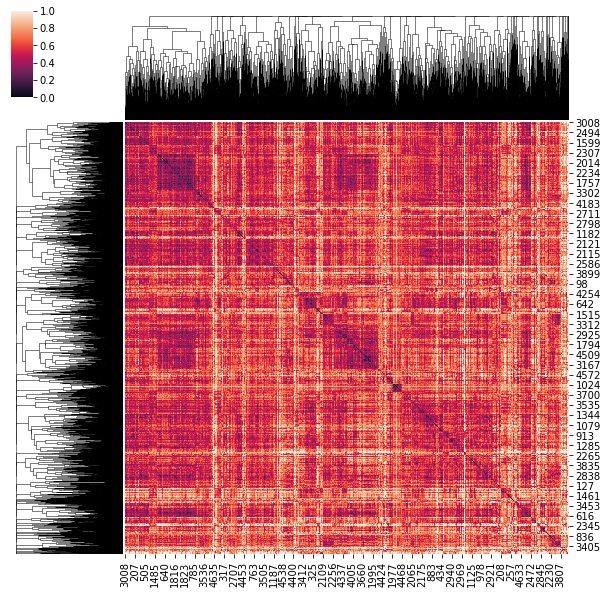

In [52]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

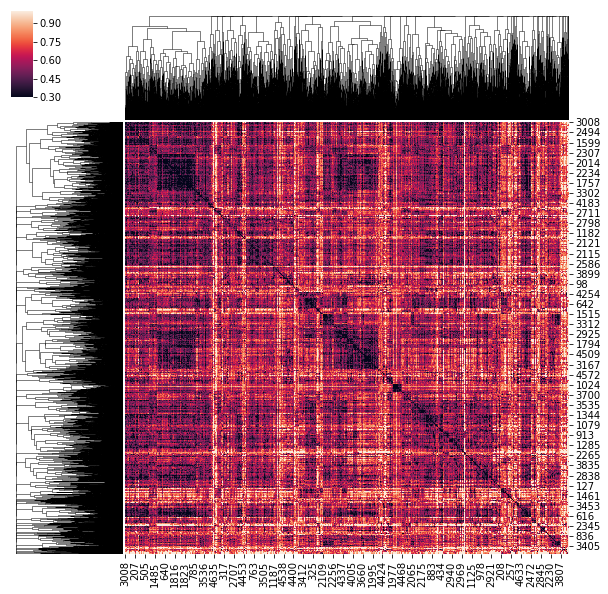

In [55]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

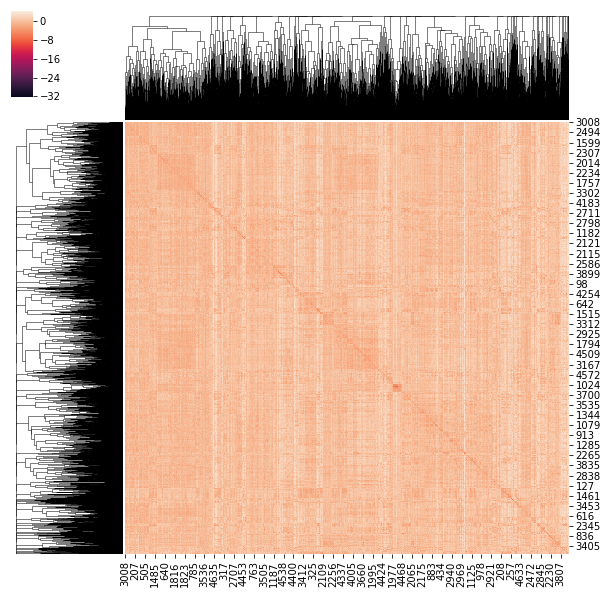

In [58]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

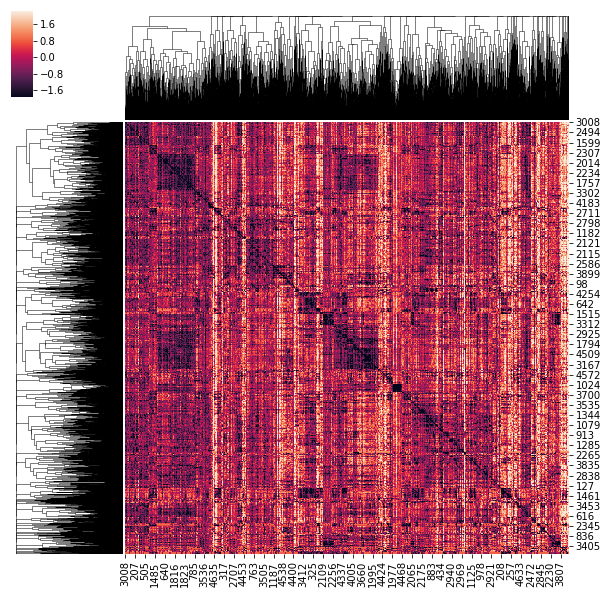

In [59]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)

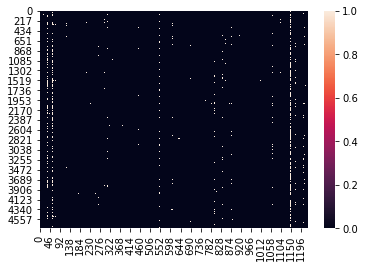

In [13]:
heatmap_test = sns.heatmap(matrix_sliced)

In [ ]:
heatmap_test.savefig("heatmap.pdf")